# Project by : Susmita Sandip Pawar

# Batch : masters in data science and analytics with ai .

# Institute of IT vedant (T305)

## Guided by- Sameer Warsolkar Sir

## Project Name : Loan Approval prediction by using classification algorithm

## Objective of project:

### The goal is to develop a machine learning model for Loan Approval Prediction, to potentially replace the updatable supervised machine learning classification .models by predicting results in the form of best accuracy.

#### The dataset contains 13 features are listed below: 

**Loan** : A unique id 

**Gender** :Gender of the applicant Male/female

**Married** :Marital Status of the applicant, values will be Yes/ No

**Dependents** :It tells whether the applicant has any dependents or not.

**Education** :It will tell us whether the applicant is Graduated or not.

**Self_Employed** :This defines that the applicant is self-employed i.e. Yes/ No

**ApplicantIncome** :Applicant income

**CoapplicantIncome** :Co-applicant income

**LoanAmount** :Loan amount (in thousands)

**Loan_Amount_Term** :Terms of loan (in months)

**Credit_History** :Credit history of individual’s repayment of their debts

**Property_Area** :Area of property i.e. Rural/Urban/Semi-urban 

**Loan_Status** :Status of Loan Approved or not i.e. Y- Yes, N-No 

#### Firstly we have to import libraries :

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import os
os.getcwd()

'C:\\Users\\pawar'

# Reading Data

In [3]:
df = pd.read_csv('LOAN_DATA_OG.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [4]:
df.head() #It display first five row 

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
df.tail() #It display last five row

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


# EDA process part in Dataset

In [6]:
df.info() #It display the information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


#### We can observe 13 attributes. Out of which 4 attributes are in float, 1 attribute is in integer and the other 8 are in objects.

In [7]:
df.isnull().sum() #Handling missing values

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

#### We have found 6 columns having NULL values. And we have to replace the NULL values with some common values.

In [8]:
df.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
df.describe() #It displays the stastical information of the data

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


#### describe() is used to give Statistical Information of Dataset. The total count column displays some missing values .The ['credit_history'] attributes are in the range of 0 to 1. The ['CoapplicantIncome'] attributes has min values are 0 so we have to replace it with nan and after that replace with mean

In [10]:
df["CoapplicantIncome"].replace(0, np.nan, inplace=True)

In [11]:
df["CoapplicantIncome"].replace(np.nan,df["CoapplicantIncome"].mean(),inplace=True)

In [12]:
df.shape

(614, 13)

In [13]:
df.describe() # after the above process final statistical information displayed.

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,2919.193314,146.412162,342.00000,0.842199
std,6109.041673,2540.709504,85.587325,65.12041,0.364878
min,150.000000,16.120001,9.000000,12.00000,0.000000
25%,2877.500000,2064.750000,100.000000,360.00000,1.000000
50%,3812.500000,2919.193314,128.000000,360.00000,1.000000
75%,5795.000000,2919.193314,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# # Let us fill in the missing values for numerical terms using mode operation.

In [14]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace = True)
df['Married'].fillna(df['Married'].mode()[0],inplace = True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())


df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

#### All the missing values will be filled with the most frequently occurring values. Modes give the result in their terms of the data frame, so we only need the values. We will specify 0th index to display the values.

In [17]:
df.shape # the number of elements in each dimension

(614, 13)

# Data visualization for categorical dataset

number of people who take loan as group by gender:
Male      502
Female    112
Name: Gender, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

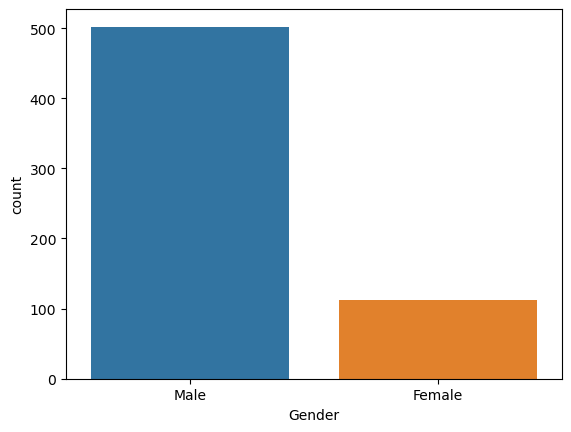

In [18]:
#we will see the number of people who take loan as group by gender
print("number of people who take loan as group by gender:")
print(df['Gender'].value_counts())
sns.countplot(x='Gender', data=df)

#### As per the number of oberervation in each category bins are displayed using bar so the gender are male and female. so Male take loan as count 502 and female take loan as count 112.

number of people who take loan as group by marital_status:
Yes    401
No     213
Name: Married, dtype: int64


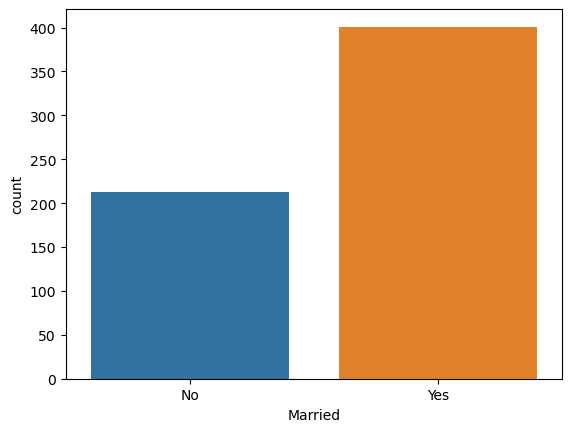

In [19]:
#we will see the number of people who take loan as group by marital status
print("number of people who take loan as group by marital_status:")
print(df['Married'].value_counts())
sns.countplot(x='Married', data=df)
plt.show()

#### As per the observation the marital_status wise  Yes means they are Married  and  take loan as count 401 and No means unmarried take loan as count 213.

number of people who take loan as group by Dependents:
0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


<Axes: xlabel='Dependents', ylabel='count'>

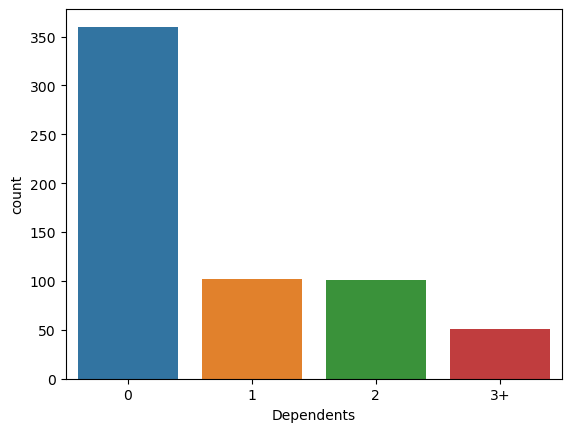

In [20]:
#we will see the number of people who take loan as group by Dependents
print("number of people who take loan as group by Dependents:")
print(df['Dependents'].value_counts())
sns.countplot(x='Dependents', data=df)

#### As per the observation the dependents 0 dependents are take loan as count 360 ,1 dependents are take loan as 102 and 2 dependents are take loan as 101 and 3+ dependents take loan as count 51

number of people who take loan as group by Self_Employed:
No     532
Yes     82
Name: Self_Employed, dtype: int64


<Axes: xlabel='Self_Employed', ylabel='count'>

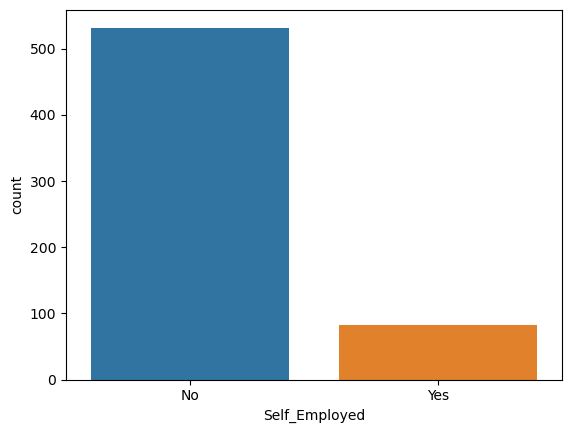

In [21]:
#we will see the number of people who take loan as group by Self_Employed
print("number of people who take loan as group by Self_Employed:")
print(df['Self_Employed'].value_counts())
sns.countplot(x='Self_Employed', data=df)

#### As per the observation the No they are take loan as count 532 and yes as count is 82

number of people who take loan as group by LoanAmount:
146.412162    22
120.000000    20
110.000000    17
100.000000    15
160.000000    12
              ..
240.000000     1
214.000000     1
59.000000      1
166.000000     1
253.000000     1
Name: LoanAmount, Length: 204, dtype: int64


<Axes: xlabel='LoanAmount', ylabel='count'>

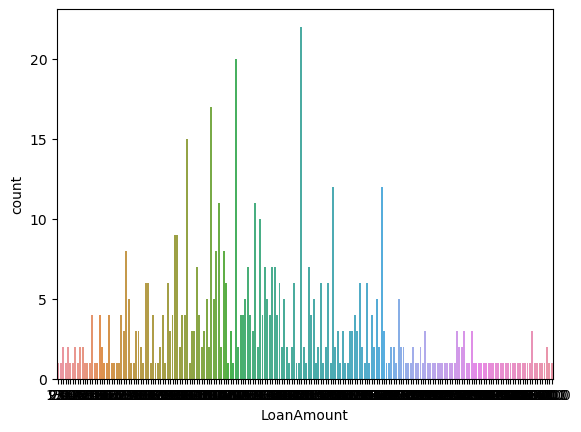

In [22]:
#we will see the number of people who take loan as group by LoanAmount
print("number of people who take loan as group by LoanAmount:")
print(df['LoanAmount'].value_counts())
sns.countplot(x='LoanAmount', data=df)

number of people who take loan as group by Credit_History:
1.0    525
0.0     89
Name: Credit_History, dtype: int64


<Axes: xlabel='Credit_History', ylabel='count'>

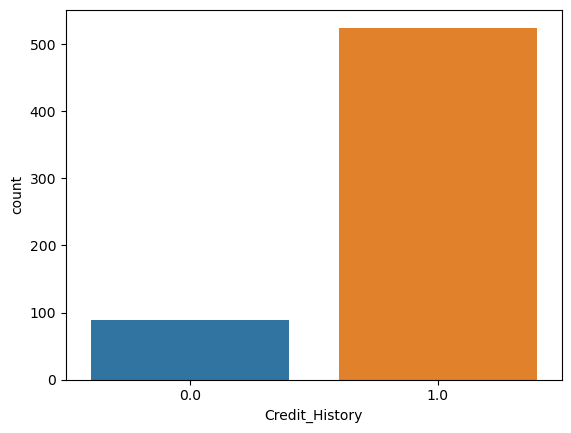

In [24]:
#we will see the number of people who take loan as group by Credit_History
print("number of people who take loan as group by Credit_History:")
print(df['Credit_History'].value_counts())
sns.countplot(x='Credit_History', data=df)

# Data visualization for numerical dataset

<Axes: xlabel='ApplicantIncome', ylabel='Density'>

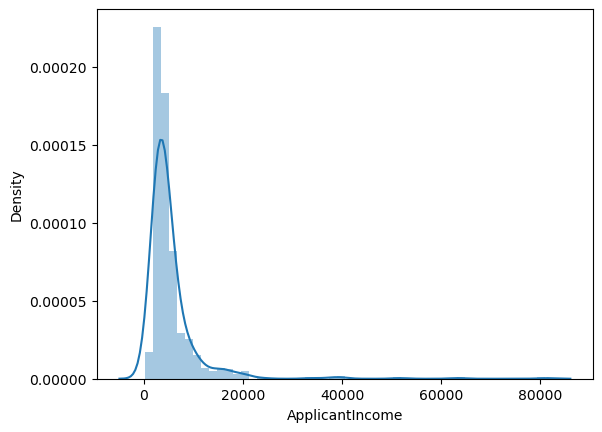

In [25]:
sns.distplot(df["ApplicantIncome"])

<Axes: xlabel='CoapplicantIncome', ylabel='Density'>

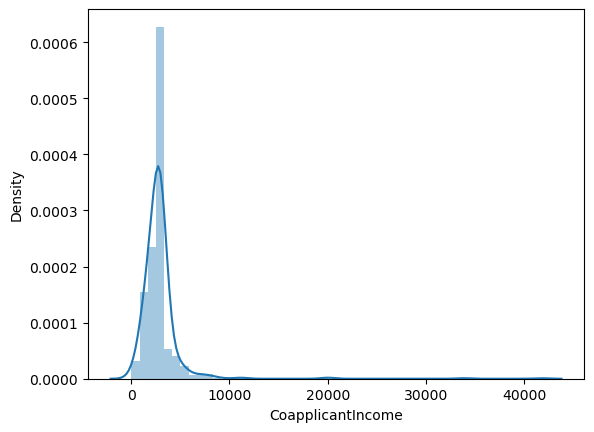

In [26]:
sns.distplot(df["CoapplicantIncome"])

<Axes: xlabel='LoanAmount', ylabel='Density'>

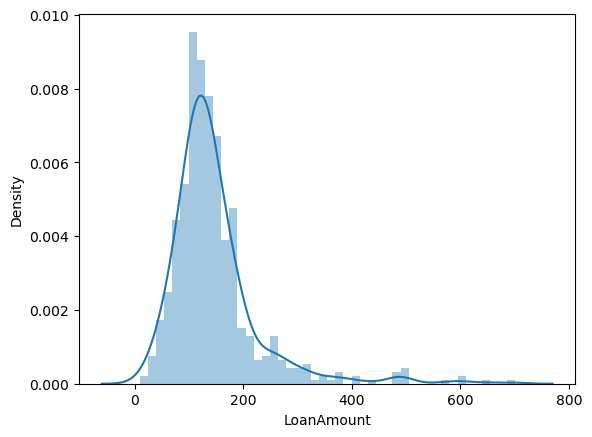

In [27]:
sns.distplot(df["LoanAmount"])

<Axes: xlabel='Loan_Amount_Term', ylabel='Density'>

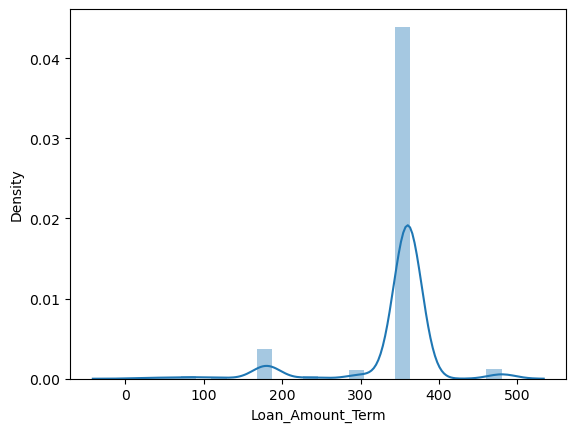

In [28]:
sns.distplot(df['Loan_Amount_Term'])

<Axes: xlabel='Credit_History', ylabel='Density'>

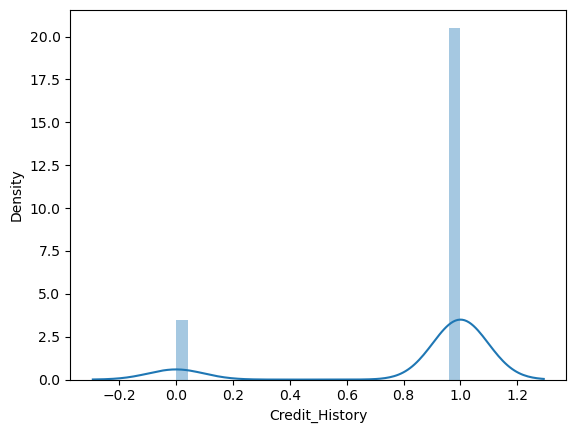

In [29]:
sns.distplot(df['Credit_History'])

In [30]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,2919.193314,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000000,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,2919.193314,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000000,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,2919.193314,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,2919.193314,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,2919.193314,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.000000,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,2919.193314,187.000000,360.0,1.0,Urban,Y


# Label Encoding

#### label encoding is a technique used in machine learning and data analysis to convert categorical variables into numerical format. 

In [31]:
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [32]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,0,0,5849,2919.193314,146.412162,360.0,1.0,2,1
1,LP001003,1,1,1,0,0,4583,1508.000000,128.000000,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,2919.193314,66.000000,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.000000,120.000000,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,2919.193314,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,0,0,0,0,2900,2919.193314,71.000000,360.0,1.0,0,1
610,LP002979,1,1,3,0,0,4106,2919.193314,40.000000,180.0,1.0,0,1
611,LP002983,1,1,1,0,0,8072,240.000000,253.000000,360.0,1.0,2,1
612,LP002984,1,1,2,0,0,7583,2919.193314,187.000000,360.0,1.0,2,1


#### Our data is converted ito numerical format

## Splitting the data into x and y

In [33]:
x = df.iloc[:,:-1].values
y = df['Loan_Status']

In [34]:
x

array([['LP001002', 1, 0, ..., 360.0, 1.0, 2],
       ['LP001003', 1, 1, ..., 360.0, 1.0, 0],
       ['LP001005', 1, 1, ..., 360.0, 1.0, 2],
       ...,
       ['LP002983', 1, 1, ..., 360.0, 1.0, 2],
       ['LP002984', 1, 1, ..., 360.0, 1.0, 2],
       ['LP002990', 0, 0, ..., 360.0, 0.0, 1]], dtype=object)

In [35]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int32

#### Separate features (x) and target variable (y)

#### Target Variable (y) : we to worked on target variable so we can check the how many values are present on respective column

In [36]:
df['Loan_Status'].value_counts()

1    422
0    192
Name: Loan_Status, dtype: int64

#### As per the result the target column are unbalanced so we need to balanced it first

#### Random OverSampling is technique for rebalancing the class distribution for an imbalanced dataset.

#### Steps for balanced data by using Oversampling method

# OverSampling: Duplicating samples from minority class

In [37]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [38]:
ros=RandomOverSampler(random_state=1)
x_ros,y_ros=ros.fit_resample(x,y)

In [39]:
print("Original Dataset",Counter(y))
print("Resampled Dataset",Counter(y_ros))

Original Dataset Counter({1: 422, 0: 192})
Resampled Dataset Counter({1: 422, 0: 422})


#### As per the obesrvation is data is now balanced perfectly

# Splitting the data into Train-Test set

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42)

# Model Training

In [41]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder_x = LabelEncoder()

In [42]:
for i in range(0,5):
    x_train[:,i]= LabelEncoder_x.fit_transform(x_train[:,i])
    x_train[:,i]= LabelEncoder_x.fit_transform(x_train[:,7])
x_train

array([[118, 118, 118, ..., 360.0, 1.0, 1],
       [157, 157, 157, ..., 360.0, 1.0, 1],
       [62, 62, 62, ..., 360.0, 1.0, 1],
       ...,
       [159, 159, 159, ..., 360.0, 1.0, 2],
       [159, 159, 159, ..., 240.0, 1.0, 1],
       [159, 159, 159, ..., 360.0, 1.0, 2]], dtype=object)

In [43]:
LabelEncoder_y = LabelEncoder()
y_train = LabelEncoder_y.fit_transform(y_train)
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [44]:
for i in range(0,5):
    x_test[:,i]= LabelEncoder_x.fit_transform(x_test[:,i])
    x_test[:,7]= LabelEncoder_x.fit_transform(x_test[:,7])
x_test

array([[75, 1, 1, ..., 360.0, 1.0, 1],
       [80, 1, 1, ..., 360.0, 1.0, 1],
       [37, 1, 1, ..., 360.0, 1.0, 0],
       ...,
       [56, 1, 1, ..., 480.0, 1.0, 1],
       [3, 1, 1, ..., 360.0, 1.0, 2],
       [73, 1, 1, ..., 180.0, 1.0, 2]], dtype=object)

In [45]:
LabelEncoder_y = LabelEncoder()

y_test = LabelEncoder_y.fit_transform(y_test)
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [46]:
from sklearn.preprocessing import MinMaxScaler

ss= MinMaxScaler()
x_train = ss.fit_transform(x_train)
x_test = ss.fit_transform(x_test)

In [47]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

#### Acuuracy checking for random forest classifier is 

In [50]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

y_pred = rf_clf.predict(x_test)

print("Acuuracy of random forest classifier is ", accuracy_score(y_pred,y_test))

Acuuracy of random forest classifier is  0.6016260162601627


#### Classification Report for random forest classifier

In [52]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report for random forest classifier:\n{classification_rep}')

Confusion Matrix:
[[32 11]
 [38 42]]
Classification Report for random forest classifier:
              precision    recall  f1-score   support

           0       0.46      0.74      0.57        43
           1       0.79      0.53      0.63        80

    accuracy                           0.60       123
   macro avg       0.62      0.63      0.60       123
weighted avg       0.68      0.60      0.61       123



#### Accuracy checking for LogisticRegression

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression(solver="sag")

# Train the model
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Evaluate the model
print('Accuracy of LogisticRegression:', accuracy_score(y_test, y_pred))

Accuracy of LogisticRegression: 0.7886178861788617


#### Classification Report for Logistic Regression classifier

In [56]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



#### Accuracy checking for DecisionTreeClassifier 

In [49]:
from sklearn.tree import DecisionTreeClassifier

# Same preprocessing steps as above...

# Create decision tree model
model = DecisionTreeClassifier(max_depth=7,min_samples_leaf=5,random_state=42)

# Train the model
model.fit(x_train, y_train)

# Predict on test data
y_pred = model.predict(x_test)

# Evaluate the model
print('Accuracy of DecisionTreeClassifier :', accuracy_score(y_test, y_pred))

Accuracy of DecisionTreeClassifier : 0.7723577235772358


#### Classification Report for DecisionTree Classifier

In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)


print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report for DecisionTree Classifier:\n{classification_rep}')

Confusion Matrix:
[[32 11]
 [38 42]]
Classification Report for DecisionTree Classifier:
              precision    recall  f1-score   support

           0       0.46      0.74      0.57        43
           1       0.79      0.53      0.63        80

    accuracy                           0.60       123
   macro avg       0.62      0.63      0.60       123
weighted avg       0.68      0.60      0.61       123



#### Acuuracy checking for Support Vector Machine

In [55]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
svm = SVC()
svm.fit(x_train, y_train)
y_pred = svm.predict(x_test)
print("Acuuracy of Support Vector Machine: ", accuracy_score(y_test, y_pred))

Acuuracy of Support Vector Machine:  0.7886178861788617


HyperTunning the SVM Model

In [56]:
param_grid={'C':[1,10],'gamma':[1,10]}
GS=GridSearchCV(svm,param_grid,cv=4,verbose=3)
GS.fit(x_train,y_train)

Fitting 4 folds for each of 4 candidates, totalling 16 fits
[CV 1/4] END ......................C=1, gamma=1;, score=0.821 total time=   0.0s
[CV 2/4] END ......................C=1, gamma=1;, score=0.829 total time=   0.0s
[CV 3/4] END ......................C=1, gamma=1;, score=0.797 total time=   0.0s
[CV 4/4] END ......................C=1, gamma=1;, score=0.820 total time=   0.0s
[CV 1/4] END .....................C=1, gamma=10;, score=0.789 total time=   0.0s
[CV 2/4] END .....................C=1, gamma=10;, score=0.821 total time=   0.0s
[CV 3/4] END .....................C=1, gamma=10;, score=0.740 total time=   0.0s
[CV 4/4] END .....................C=1, gamma=10;, score=0.811 total time=   0.0s
[CV 1/4] END .....................C=10, gamma=1;, score=0.797 total time=   0.0s
[CV 2/4] END .....................C=10, gamma=1;, score=0.821 total time=   0.0s
[CV 3/4] END .....................C=10, gamma=1;, score=0.780 total time=   0.0s
[CV 4/4] END .....................C=10, gamma=1;,

GridSearchCV(cv=4, estimator=SVC(), param_grid={'C': [1, 10], 'gamma': [1, 10]},
             verbose=3)

To find the Best C and Gamma

In [57]:
Best_c_gamma = GS.best_params_
Best_c_gamma

{'C': 1, 'gamma': 1}

Implementing C =1 and gamma=1 in SVM

In [58]:
svm_improved = SVC(C=1,gamma=1)
svm_improved.fit(x_train, y_train)
y_pred = svm_improved.predict(x_test)
print("Acuuracy of Support Vector Machine: ", accuracy_score(y_test, y_pred))

Acuuracy of Support Vector Machine:  0.7886178861788617


#### Classification Report for Support Vector Machine

In [59]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{classification_rep}')

Confusion Matrix:
[[18 25]
 [ 1 79]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



# conclusion:

#### The LogisticRegression algorithm gives us maximum Accuracy score is 0.7886178861788617. compared to the other 4 machine learnig classification algorithm.The best accuracy with an accuracy score of 78%.